# Práctica 2

## Carga de librerias

In [136]:
import numpy as np
import pandas as pd 

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lars, Lasso, Ridge, BayesianRidge, ElasticNet
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
import warnings
warnings.filterwarnings('ignore')

In [138]:
pd.set_option('display.float_format', lambda x: "{:,.6f}".format(x))

In [139]:
SEED = 345

## Lectura de datos

In [140]:
df = pd.read_csv("/Users/gblasd/Documents/DataScience/02_SupervisedLearning/data/winequality/winequality-red.csv", sep=";")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,5
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,5
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,6
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.200000,0.600000,0.080000,2.000000,0.090000,32.000000,44.000000,0.994900,3.450000,0.580000,10.500000,5
1595,5.900000,0.550000,0.100000,2.200000,0.062000,39.000000,51.000000,0.995120,3.520000,0.760000,11.200000,6
1596,6.300000,0.510000,0.130000,2.300000,0.076000,29.000000,40.000000,0.995740,3.420000,0.750000,11.000000,6
1597,5.900000,0.645000,0.120000,2.000000,0.075000,32.000000,44.000000,0.995470,3.570000,0.710000,10.200000,5


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Análisis Exploratorio

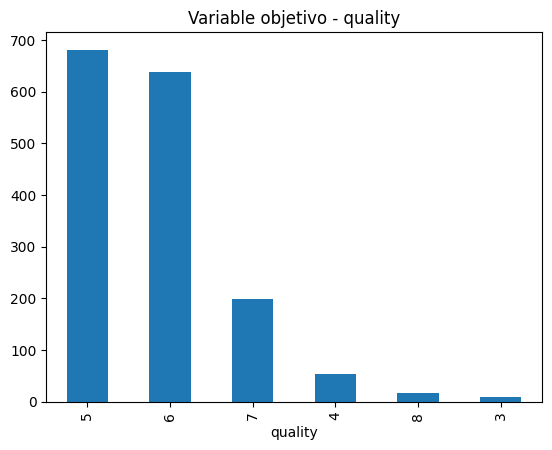

In [142]:
target = 'quality'
df[target].value_counts().plot(kind='bar')
plt.title("Variable objetivo - quality")
plt.show()

In [143]:
ls_cont = df.select_dtypes(include=['float']).columns.to_list()
print(len(ls_cont))
print(ls_cont)

11
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


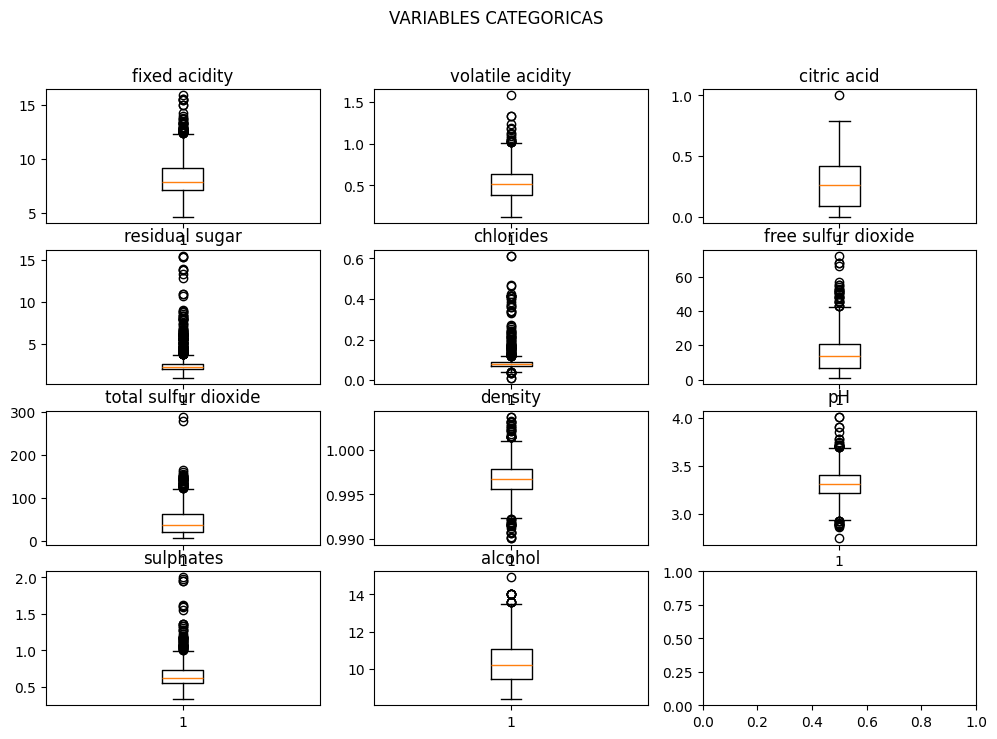

In [144]:
import matplotlib.pyplot as plt
import numpy as np

# numeric columns in DataFrame
col_df_num = ls_cont

n_cols = 3
n_rows = 4

#fig = plt.figure(layout="constrained", figsize=(10, 10))
fig = plt.figure(figsize=(12, 8))
ax_array = fig.subplots(n_rows, n_cols, squeeze=False)
fig.suptitle('VARIABLES CATEGORICAS')

index_col = 0
for row in range(n_rows):
    for col in range(n_cols):
        ax_array[row, col].boxplot(df[col_df_num[index_col]])
        ax_array[row, col].set_title(col_df_num[index_col])
        index_col += 1
        # to avoid error, break loop
        if index_col >= len(col_df_num):
            break

In [145]:
df[ls_cont].describe(percentiles=[.01, .25, .50, .75, .99])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,"1,599.000000","1,599.000000","1,599.000000","1,599.000000","1,599.000000","1,599.000000","1,599.000000","1,599.000000","1,599.000000","1,599.000000","1,599.000000"
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
1%,5.200000,0.190000,0.000000,1.400000,0.042980,3.000000,8.000000,0.991820,2.930000,0.420000,9.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
99%,13.300000,1.020000,0.700200,8.306000,0.360160,50.020000,145.000000,1.001506,3.700200,1.260400,13.400000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [146]:
print(df.shape)
df = df[df['total sulfur dioxide'] < df['total sulfur dioxide'].quantile(.99)]
print(df.shape)

(1599, 12)
(1581, 12)


In [147]:
print(df.shape)
df = df[df['citric acid'] < df['citric acid'].quantile(.99)]
print(df.shape)

(1581, 12)
(1565, 12)


In [148]:
#_ = sns.pairplot(df[ls_cont], kind="reg", diag_kind="kde")

## Ingenieria de Variables

In [149]:
df['Acidicity Total'] = df['fixed acidity'] + df['volatile acidity'] + df['citric acid']
df['Ratio fixed acidity/volatile acidity'] = df['citric acid'] / df['volatile acidity']
df['Ratio citric acid/Acidity Total'] = df['citric acid'] / df['Acidicity Total']
df['density * alchohol'] = df['density']*df['alcohol']
df['Ratio free sulful dioxide/total sulful dioxide'] = df['free sulfur dioxide']/df['total sulfur dioxide']

In [150]:
#ls_cont = ls_cont + ['Acidicity Total', 'Ratio fixed acidity/volatile acidity', 'Ratio citric acid/Acidity Total', 'density * alchohol','Ratio free sulful dioxide/total sulful dioxide']
#ls_cont

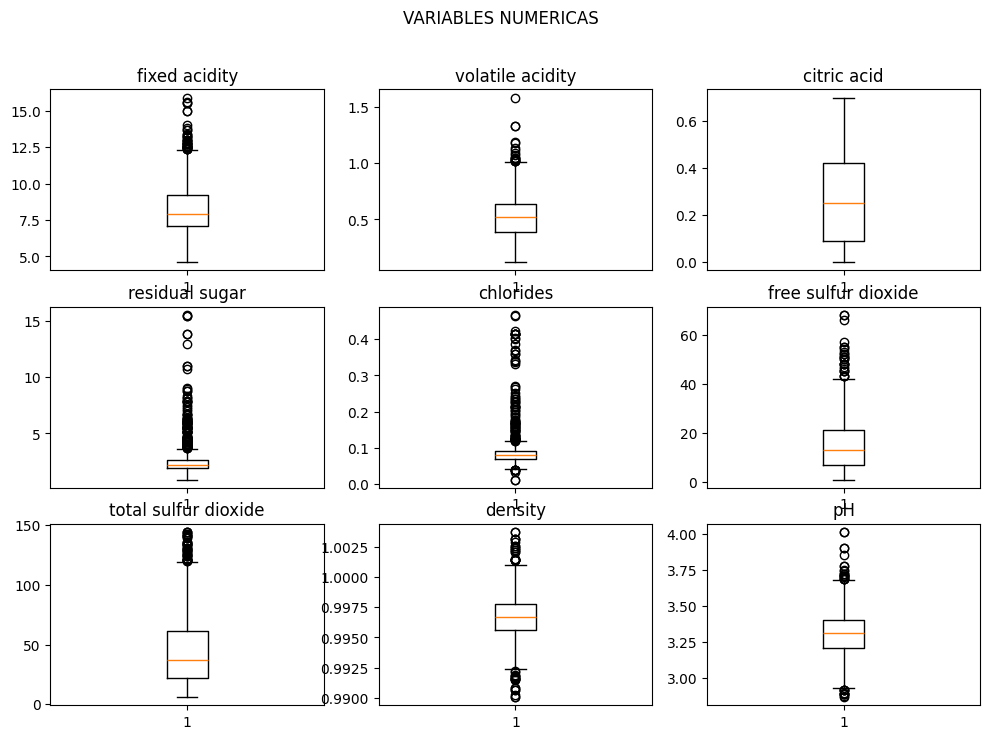

In [151]:
import matplotlib.pyplot as plt
import numpy as np

# numeric columns in DataFrame
col_df_num = ls_cont

n_cols = 3
n_rows = 3

#fig = plt.figure(layout="constrained", figsize=(10, 10))
fig = plt.figure(figsize=(12, 8))
ax_array = fig.subplots(n_rows, n_cols, squeeze=False)
fig.suptitle('VARIABLES NUMERICAS')

index_col = 0
for row in range(n_rows):
    for col in range(n_cols):
        ax_array[row, col].boxplot(df[col_df_num[index_col]])
        ax_array[row, col].set_title(col_df_num[index_col])
        index_col += 1
        # to avoid error, break loop
        if index_col >= len(col_df_num):
            break

In [152]:
df = df.reset_index(drop=False)
df.head(3)

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Acidicity Total,Ratio fixed acidity/volatile acidity,Ratio citric acid/Acidity Total,density * alchohol,Ratio free sulful dioxide/total sulful dioxide
0,0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5,8.100000,0.000000,0.000000,9.379320,0.323529
1,1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,5,8.680000,0.000000,0.000000,9.768640,0.373134
2,2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,5,8.600000,0.052632,0.004651,9.770600,0.277778


In [153]:
um = ["index"]
df[um].head(3)

,index
0,0
1,1
2,2


# Entrenamiento de modelos

## Mejores Variables

In [166]:
X = df[ ls_cont ]
y = df[ target ]

In [167]:
# Seleccion de mejores variables
from sklearn.feature_selection import SelectKBest, f_classif, f_regression

kb = SelectKBest( k=5, score_func=f_regression )
kb.fit(X, y)
print(kb.get_feature_names_out())
ls_best = [x for x, y in zip(X.columns, kb.get_support()) if y]
print("Mejores variables: " , ls_best)
X = pd.DataFrame(kb.transform(X), columns=ls_best)
y = df[target]

ls_cont = ls_best

['volatile acidity' 'citric acid' 'total sulfur dioxide' 'sulphates'
 'alcohol']
Mejores variables:  ['volatile acidity', 'citric acid', 'total sulfur dioxide', 'sulphates', 'alcohol']


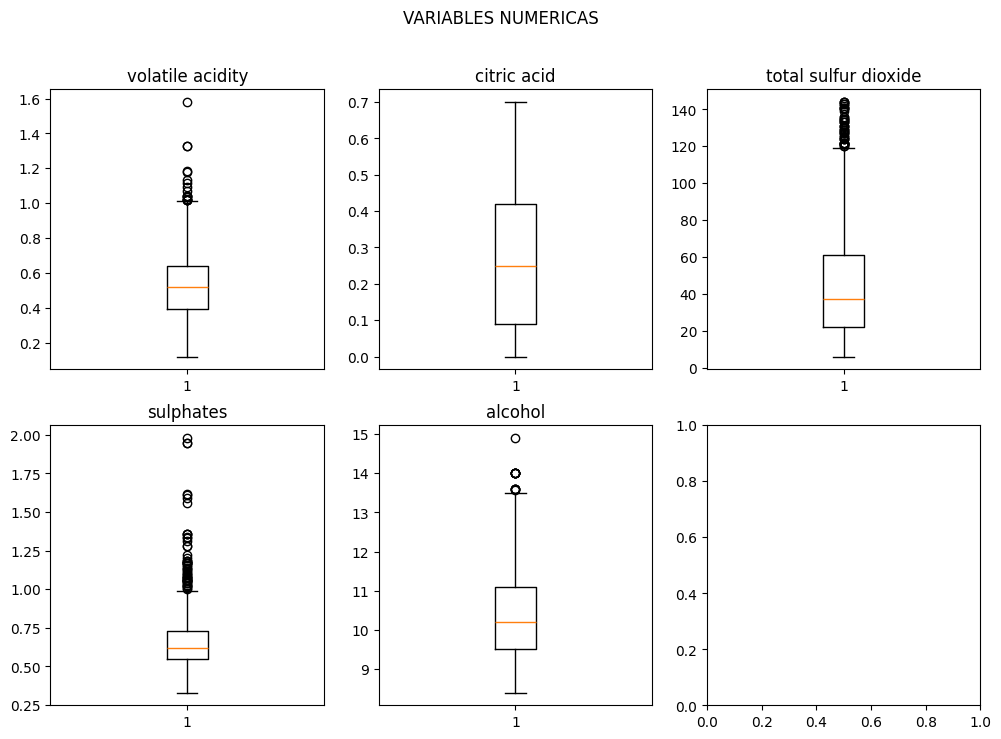

In [168]:
import matplotlib.pyplot as plt
import numpy as np

# numeric columns in DataFrame
col_df_num = ls_cont

n_cols = 3
n_rows = 2

#fig = plt.figure(layout="constrained", figsize=(10, 10))
fig = plt.figure(figsize=(12, 8))
ax_array = fig.subplots(n_rows, n_cols, squeeze=False)
fig.suptitle('VARIABLES NUMERICAS')

index_col = 0
for row in range(n_rows):
    for col in range(n_cols):
        ax_array[row, col].boxplot(df[col_df_num[index_col]])
        ax_array[row, col].set_title(col_df_num[index_col])
        index_col += 1
        # to avoid error, break loop
        if index_col >= len(col_df_num):
            break

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED)

In [170]:
X_train.head()

,volatile acidity,citric acid,total sulfur dioxide,sulphates,alcohol
780,0.530000,0.120000,12.000000,0.860000,9.200000
734,0.700000,0.000000,19.000000,0.530000,10.000000
420,0.370000,0.690000,24.000000,0.650000,12.800000
338,0.815000,0.020000,34.000000,0.890000,12.300000
488,0.490000,0.630000,26.000000,0.780000,12.500000


In [22]:
y_test.head()

1480    4
68      5
666     6
1417    7
1275    6
Name: quality, dtype: int64

In [23]:
dc_scores = {}

array_models = {}

## Regresion LARS

In [24]:
lars_model = Lars()
lars_model.fit(X_train, y_train)

Lars()

In [25]:
ls_res = cross_val_score(estimator=lars_model, X=X_test, y=y_test, cv=4, n_jobs=-1, scoring="r2")
print(ls_res, "\n")

[0.34541643 0.28168545 0.33632011 0.26351547] 



In [26]:
print("MEAN: ", np.mean(ls_res))
print("STD:  ", np.std(ls_res))
print("Intercept: ", lars_model.intercept_)
print("Coef:      ", lars_model.coef_)

MEAN:  0.30673436395426446
STD:   0.034881724750534804
Intercept:  2.875819770926919
Coef:       [-1.15125144 -0.0568573  -0.00296006  0.87258157  0.28198677]


In [27]:
dc_scores.update({str(lars_model).split("(")[0]: np.mean(ls_res)})
dc_scores

{'Lars': np.float64(0.30673436395426446)}

In [28]:
array_models.update({str(lars_model).split("(")[0]: lars_model})
array_models

{'Lars': Lars()}

In [29]:
y_pred = lars_model.predict(X_test)

Text(0, 0.5, 'Predicted Values')

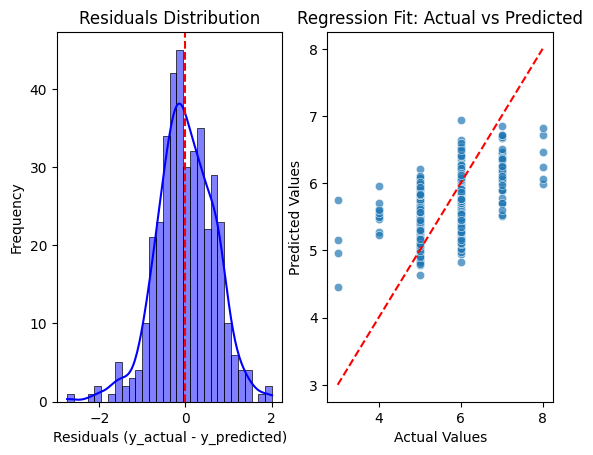

In [30]:
# Plot 1: Residuals Distribution.
plt.subplot(1,2,1)
residuals = y_test - y_pred
sns.histplot(residuals, bins=30, kde=True, color="blue")
plt.axvline(x=0, color='red', linestyle='--')
plt.title("Residuals Distribution")
plt.xlabel("Residuals (y_actual - y_predicted)")
plt.ylabel("Frequency")

# Plot 2: Regression Fit (Actual vs Predicted).
plt.subplot(1,2,2)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect fit line
plt.title("Regression Fit: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

volatile acidity = -1.1512514428
citric acid = -0.0568573
total sulfur dioxide = -0.0029600559
sulphates = 0.8725815686
alcohol = 0.2819867677
Intercept: 2.875819770926919

Feature Coefficients:
                 Feature  Coefficient
0      volatile acidity    -1.151251
1           citric acid    -0.056857
2  total sulfur dioxide    -0.002960
3             sulphates     0.872582
4               alcohol     0.281987


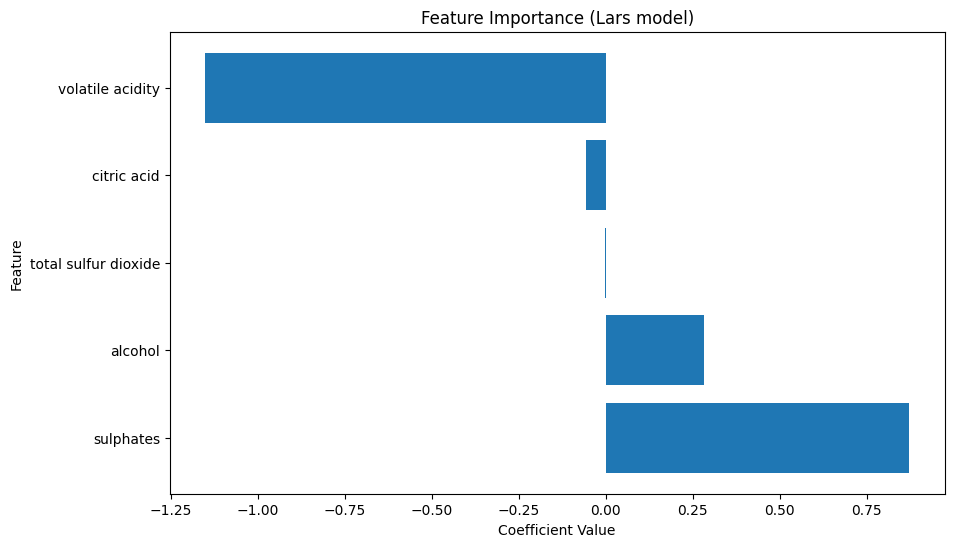

In [31]:
#print("Model coefficients:\n")
for i in range(X_test.shape[1]):
    print(X_test.columns[i], "=", lars_model.coef_[i].round(10))

# Extraer información del modelo
print("Intercept:", lars_model.intercept_)
coeff_df = pd.DataFrame({"Feature": X_test.columns, "Coefficient": lars_model.coef_})
print("\nFeature Coefficients:\n", coeff_df)

# Resumir los resultados del modelo 
# Sort dataframe by coefficients.
coef_df_sorted = coeff_df.sort_values(by="Coefficient", ascending=False)

# Create plot.
plt.figure(figsize=(10,6))
#plt.barh(coeff_df["Feature"], coef_df_sorted["Coefficient"], color="blue")
plt.barh(data=coef_df_sorted, y="Feature", width="Coefficient")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title(f"Feature Importance ({str(lars_model).split('(')[0]} model)")
plt.show()

## Regresión Lasso

/Users/gblasd/Documents/DataScience/.venv/lib/python3.13/site-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/gblasd/Documents/DataScience/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/gblasd/Documents/DataScience/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.804e+02, tolerance: 5.734e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers impleme

0.0 34.62% 0.04
0.001 34.68% 0.04
0.002 34.73% 0.04
0.003 34.75% 0.04


<Axes: >

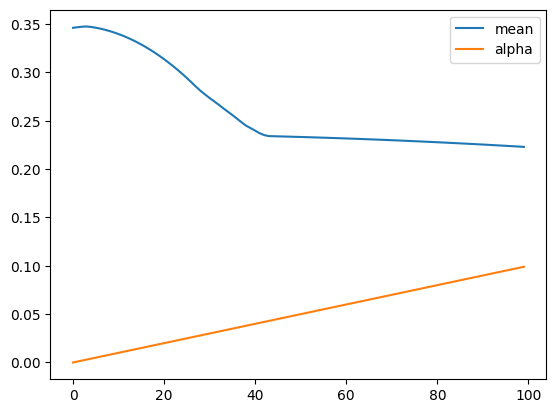

In [32]:
best_mean = 0
best_alpha = 0

ls_index = []
ls_mean = []
ls_alphas = []

for i in range(0, 1000, 10):
    lasso = Lasso(alpha=i/10000)
    lasso.fit(X, y)
    ls_res = cross_val_score(estimator = lasso, X=X_train, y=y_train, cv=4, n_jobs=-1, scoring="r2")

    if np.mean(ls_res) > best_mean:
        best_mean = np.mean(ls_res)
        best_alpha = i/10000
    
        print(i/10000, "{:,.2%}".format(np.mean(ls_res)), "{:,.2f}".format(np.std(ls_res)))
    
    ls_index.append(i)
    ls_mean.append(np.mean(ls_res))
    ls_alphas.append(i/10000)

df_res = pd.DataFrame({
    "index":ls_index,
    "mean":ls_mean,
    "alpha":ls_alphas
})

df_res[['mean','alpha']].plot(kind='line')

In [33]:
best_alpha, best_mean

(0.003, np.float64(0.34754710578052606))

In [34]:
alpha_test = [0.0001, 0.00001, 0.000001, 0.0000001]

for a in alpha_test:
    
    lasso_model = Lasso(alpha=a)
    lasso_model.fit(X_train, y_train)

    ls_res = cross_val_score(estimator=lasso_model, X=X_test, y=y_test, cv=4, n_jobs=-1, scoring="r2")
    print(ls_res, "\n")

    print("MEAN: ", np.mean(ls_res))
    print("STD:  ", np.std(ls_res))
    print("Intercept: ", lasso_model.intercept_)
    print("Coef:      ", lasso_model.coef_)

    array_models.update({str(str(lasso_model).split("(")[0])+f"_{str(a)}": lasso_model})
    dc_scores.update({str(str(lasso_model).split("(")[0])+f"_{str(a)}": np.mean(ls_res)})

[0.3450585  0.28145943 0.3361658  0.2641925 ] 

MEAN:  0.30671905886980966
STD:   0.03458171569575387
Intercept:  2.872380628331875
Coef:       [-1.14468594 -0.0495483  -0.00296091  0.8684098   0.28206461]
[0.34538094 0.28166319 0.3363049  0.26358344] 

MEAN:  0.30673311686186494
STD:   0.03485161368037418
Intercept:  2.8754758813143444
Coef:       [-1.15059492 -0.05612641 -0.00296014  0.87216439  0.28199455]
[0.34541288 0.28168323 0.33631859 0.26352227] 

MEAN:  0.30673424193460663
STD:   0.034878712476312516
Intercept:  2.875785385946516
Coef:       [-1.15118579 -0.05678421 -0.00296006  0.87253985  0.28198755]
[0.34541607 0.28168523 0.33631995 0.26351615] 

MEAN:  0.30673435180867303
STD:   0.03488142350086522
Intercept:  2.8758163327665685
Coef:       [-1.15124488 -0.05684999 -0.00296006  0.8725774   0.28198685]


In [35]:
dc_scores

{'Lars': np.float64(0.30673436395426446),
 'Lasso_0.0001': np.float64(0.30671905886980966),
 'Lasso_1e-05': np.float64(0.30673311686186494),
 'Lasso_1e-06': np.float64(0.30673424193460663),
 'Lasso_1e-07': np.float64(0.30673435180867303)}

In [36]:
array_models

{'Lars': Lars(),
 'Lasso_0.0001': Lasso(alpha=0.0001),
 'Lasso_1e-05': Lasso(alpha=1e-05),
 'Lasso_1e-06': Lasso(alpha=1e-06),
 'Lasso_1e-07': Lasso(alpha=1e-07)}

In [37]:
lasso_model = Lasso(alpha=best_alpha)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.003)

In [38]:
ls_res = cross_val_score(estimator=lasso_model, X=X_test, y=y_test, cv=4, n_jobs=-1, scoring="r2")
print(ls_res, "\n")

[0.33843673 0.27159542 0.32956593 0.28123507] 



In [39]:
print("MEAN: ", np.mean(ls_res))
print("STD:  ", np.std(ls_res))
print("Intercept: ", lasso_model.intercept_)
print("Coef:      ", lasso_model.coef_)

MEAN:  0.30520828743355444
STD:   0.029163178462800966
Intercept:  2.8458868428919035
Coef:       [-1.04379297  0.         -0.00294801  0.77538968  0.28400842]


In [40]:
array_models.update({str(str(lasso_model).split("(")[0])+f"_{str(best_alpha)}": lasso_model})
array_models

{'Lars': Lars(),
 'Lasso_0.0001': Lasso(alpha=0.0001),
 'Lasso_1e-05': Lasso(alpha=1e-05),
 'Lasso_1e-06': Lasso(alpha=1e-06),
 'Lasso_1e-07': Lasso(alpha=1e-07),
 'Lasso_0.003': Lasso(alpha=0.003)}

In [41]:
dc_scores.update({(str(lasso_model).split("(")[0])+f"_{best_alpha}": np.mean(ls_res)})
dc_scores

{'Lars': np.float64(0.30673436395426446),
 'Lasso_0.0001': np.float64(0.30671905886980966),
 'Lasso_1e-05': np.float64(0.30673311686186494),
 'Lasso_1e-06': np.float64(0.30673424193460663),
 'Lasso_1e-07': np.float64(0.30673435180867303),
 'Lasso_0.003': np.float64(0.30520828743355444)}

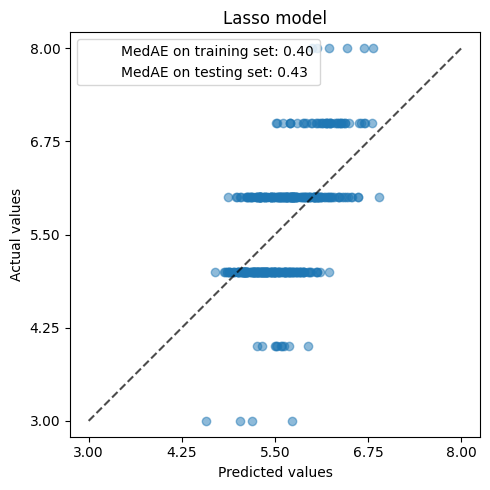

In [42]:
from sklearn.metrics import PredictionErrorDisplay, median_absolute_error

mae_train = median_absolute_error(y_train, lasso_model.predict(X_train))
y_pred = lasso_model.predict(X_test)
mae_test = median_absolute_error(y_test, y_pred)
scores = {
    "MedAE on training set": f"{mae_train:.2f}",
    "MedAE on testing set": f"{mae_test:.2f}",
}

_, ax = plt.subplots(figsize=(5, 5))
display = PredictionErrorDisplay.from_predictions(
    y_test, y_pred, kind="actual_vs_predicted", ax=ax, scatter_kwargs={"alpha": 0.5}
)
ax.set_title(f"{str(lasso_model).split('(')[0]} model")
for name, score in scores.items():
    ax.plot([], [], " ", label=f"{name}: {score}")
ax.legend(loc="upper left")
plt.tight_layout()

volatile acidity = -1.0437929685
citric acid = 0.0
total sulfur dioxide = -0.0029480079
sulphates = 0.7753896814
alcohol = 0.2840084211
Intercept: 2.8458868428919035

Feature Coefficients:
                 Feature  Coefficient
0      volatile acidity    -1.043793
1           citric acid     0.000000
2  total sulfur dioxide    -0.002948
3             sulphates     0.775390
4               alcohol     0.284008


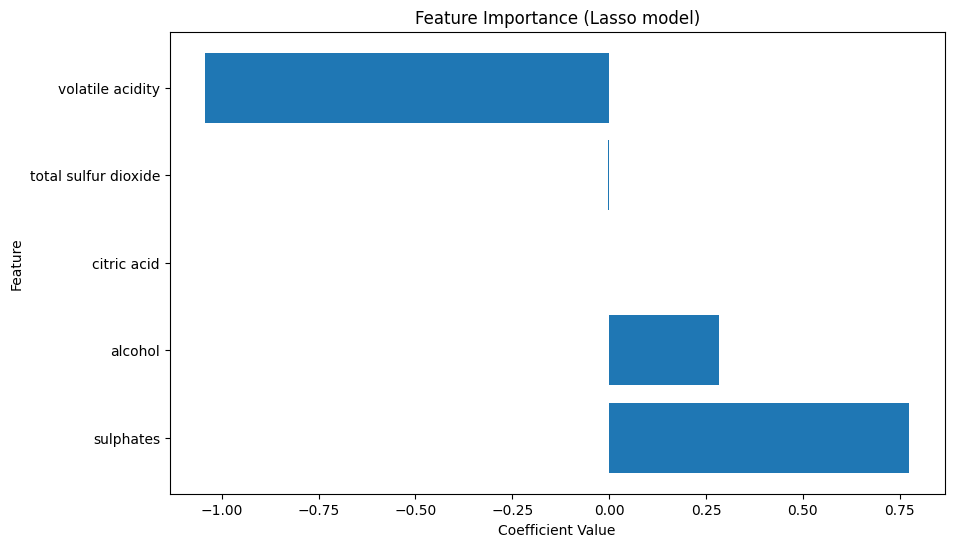

In [43]:
#print("Model coefficients:\n")
for i in range(X_test.shape[1]):
    print(X_test.columns[i], "=", lasso_model.coef_[i].round(10))

# Extraer información del modelo
print("Intercept:", lasso_model.intercept_)
coeff_df = pd.DataFrame({"Feature": X_test.columns, "Coefficient": lasso_model.coef_})
print("\nFeature Coefficients:\n", coeff_df)

# Resumir los resultados del modelo 
# Sort dataframe by coefficients.
coef_df_sorted = coeff_df.sort_values(by="Coefficient", ascending=False)

# Create plot.
plt.figure(figsize=(10,6))
#plt.barh(coeff_df["Feature"], coef_df_sorted["Coefficient"], color="blue")
plt.barh(data=coef_df_sorted, y="Feature", width="Coefficient")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title(f"Feature Importance ({str(lasso_model).split('(')[0]} model)")
plt.show()

## Regresión Ridge

0 34.62% 0.04


<Axes: >

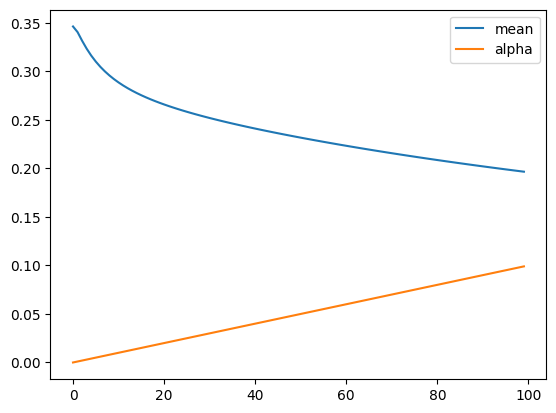

In [44]:
best_mean = 0
best_alpha = 0


ls_index = []
ls_mean = []
ls_alphas = []

for i in range(0, 1000, 10):
    ridgereg = Ridge(alpha=i)
    ridgereg.fit(X, y)
    ls_res = cross_val_score(estimator=ridgereg, X=X_train, y=y_train, cv=4, n_jobs=-1, scoring="r2")
    
    if np.mean(ls_res) > best_mean:
        best_mean = np.mean(ls_res)
        best_alpha = i/10000
        print(i,"{:,.2%}".format(np.mean(ls_res)),"{:,.2f}".format(np.std(ls_res)))

    ls_index.append(i)
    ls_mean.append(np.mean(ls_res))
    ls_alphas.append(i/10000)

df_res = pd.DataFrame({
    "index":ls_index,
    "mean":ls_mean,
    "alpha":ls_alphas
})

df_res[['mean','alpha']].plot(kind='line')


In [45]:
best_mean, best_alpha

(np.float64(0.34615604137523737), 0.0)

In [46]:
alpha_test = [0.0001, 0.00001, 0.000001, 0.0000001]

for a in alpha_test:
    
    ridge_model = Ridge(alpha=a)
    ridge_model.fit(X_train, y_train)

    ls_res = cross_val_score(estimator=ridge_model, X=X_test, y=y_test, cv=4, n_jobs=-1, scoring="r2")
    print(ls_res, "\n")

    print("MEAN: ", np.mean(ls_res))
    print("STD:  ", np.std(ls_res))
    print("Intercept: ", ridge_model.intercept_)
    print("Coef:      ", ridge_model.coef_)

    array_models.update({str(str(ridge_model).split("(")[0])+f"_{str(a)}": ridge_model})
    dc_scores.update({str(str(ridge_model).split("(")[0])+f"_{str(a)}": np.mean(ls_res)})

[0.34541558 0.28168466 0.33632002 0.26351802] 

MEAN:  0.3067345678964384
STD:   0.034880825243903665
Intercept:  2.875816914724863
Coef:       [-1.15124697 -0.05685426 -0.00296006  0.87257908  0.28198689]
[0.34541634 0.28168538 0.3363201  0.26351572] 

MEAN:  0.30673438435143724
STD:   0.0348816347955484
Intercept:  2.875819485305061
Coef:       [-1.151251   -0.056857   -0.00296006  0.87258132  0.28198678]
[0.34541642 0.28168545 0.33632011 0.26351549] 

MEAN:  0.3067343659940112
STD:   0.034881715754992784
Intercept:  2.875819742364717
Coef:       [-1.1512514  -0.05685727 -0.00296006  0.87258154  0.28198677]
[0.34541643 0.28168545 0.33632011 0.26351547] 

MEAN:  0.3067343641582394
STD:   0.034881723850980186
Intercept:  2.8758197680706976
Coef:       [-1.15125144 -0.0568573  -0.00296006  0.87258157  0.28198677]


In [47]:
ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.0)

In [48]:
ls_res = cross_val_score(estimator=ridge_model, X=X_test, y=y_test, cv=4, n_jobs=-1, scoring="r2")
print(ls_res, "\n")

[0.34541643 0.28168545 0.33632011 0.26351547] 



In [49]:
print("MEAN: ", np.mean(ls_res))
print("STD:  ", np.std(ls_res))
print("Intercept: ", ridge_model.intercept_)
print("Coef:      ", ridge_model.coef_)

MEAN:  0.30673436395426446
STD:   0.034881724750534845
Intercept:  2.8758197709269195
Coef:       [-1.15125144 -0.0568573  -0.00296006  0.87258157  0.28198677]


In [50]:
array_models.update({str(str(ridge_model).split("(")[0])+f"_{str(best_alpha)}": ridge_model})
array_models

{'Lars': Lars(),
 'Lasso_0.0001': Lasso(alpha=0.0001),
 'Lasso_1e-05': Lasso(alpha=1e-05),
 'Lasso_1e-06': Lasso(alpha=1e-06),
 'Lasso_1e-07': Lasso(alpha=1e-07),
 'Lasso_0.003': Lasso(alpha=0.003),
 'Ridge_0.0001': Ridge(alpha=0.0001),
 'Ridge_1e-05': Ridge(alpha=1e-05),
 'Ridge_1e-06': Ridge(alpha=1e-06),
 'Ridge_1e-07': Ridge(alpha=1e-07),
 'Ridge_0.0': Ridge(alpha=0.0)}

In [51]:
dc_scores.update({str(str(ridge_model).split("(")[0])+f"_{str(best_alpha)}": np.mean(ls_res)})
dc_scores

{'Lars': np.float64(0.30673436395426446),
 'Lasso_0.0001': np.float64(0.30671905886980966),
 'Lasso_1e-05': np.float64(0.30673311686186494),
 'Lasso_1e-06': np.float64(0.30673424193460663),
 'Lasso_1e-07': np.float64(0.30673435180867303),
 'Lasso_0.003': np.float64(0.30520828743355444),
 'Ridge_0.0001': np.float64(0.3067345678964384),
 'Ridge_1e-05': np.float64(0.30673438435143724),
 'Ridge_1e-06': np.float64(0.3067343659940112),
 'Ridge_1e-07': np.float64(0.3067343641582394),
 'Ridge_0.0': np.float64(0.30673436395426446)}

In [52]:
y_pred = ridge_model.predict(X_test)

Text(0, 0.5, 'Predicted Values')

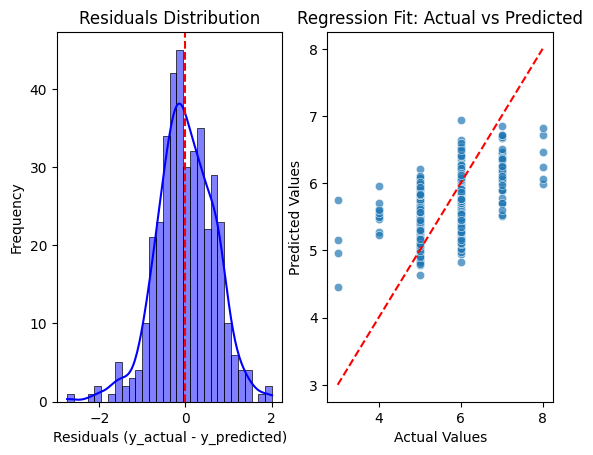

In [53]:
# Plot 1: Residuals Distribution.
plt.subplot(1,2,1)
residuals = y_test - y_pred
sns.histplot(residuals, bins=30, kde=True, color="blue")
plt.axvline(x=0, color='red', linestyle='--')
plt.title("Residuals Distribution")
plt.xlabel("Residuals (y_actual - y_predicted)")
plt.ylabel("Frequency")

# Plot 2: Regression Fit (Actual vs Predicted).
plt.subplot(1,2,2)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect fit line
plt.title("Regression Fit: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

volatile acidity = -1.1512514428
citric acid = -0.0568573
total sulfur dioxide = -0.0029600559
sulphates = 0.8725815686
alcohol = 0.2819867677
Intercept: 2.8758197709269195

Feature Coefficients:
                 Feature  Coefficient
0      volatile acidity    -1.151251
1           citric acid    -0.056857
2  total sulfur dioxide    -0.002960
3             sulphates     0.872582
4               alcohol     0.281987


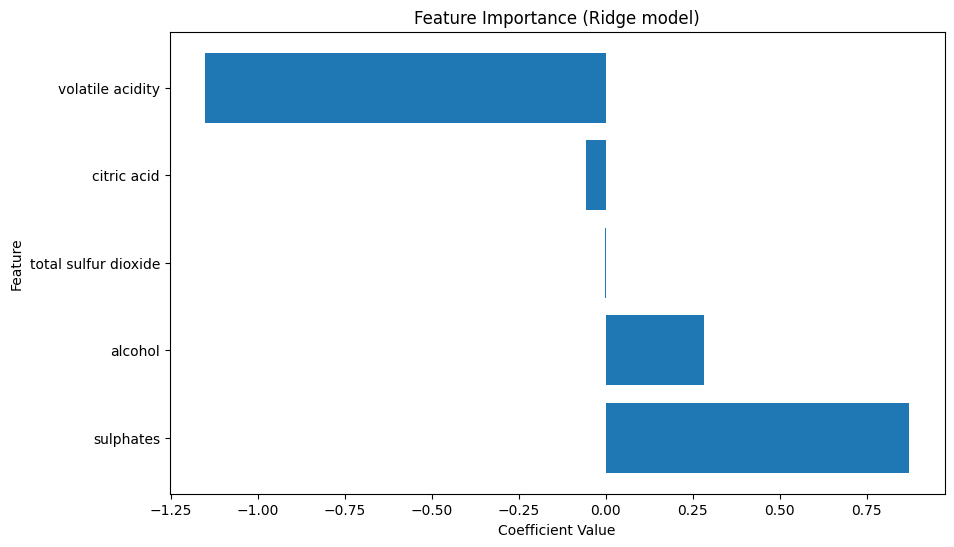

In [54]:
#print("Model coefficients:\n")
for i in range(X_test.shape[1]):
    print(X_test.columns[i], "=", ridge_model.coef_[i].round(10))

# Extraer información del modelo
print("Intercept:", ridge_model.intercept_)
coeff_df = pd.DataFrame({"Feature": X_test.columns, "Coefficient": ridge_model.coef_})
print("\nFeature Coefficients:\n", coeff_df)

# Resumir los resultados del modelo 
# Sort dataframe by coefficients.
coef_df_sorted = coeff_df.sort_values(by="Coefficient", ascending=False)

# Create plot.
plt.figure(figsize=(10,6))
#plt.barh(coeff_df["Feature"], coef_df_sorted["Coefficient"], color="blue")
plt.barh(data=coef_df_sorted, y="Feature", width="Coefficient")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title(f"Feature Importance ({str(ridge_model).split('(')[0]} model)")
plt.show()

## Regresión ElasticNet

0.0 34.62% 0.04
0 34.62% 0.04
0.001 34.63% 0.04
10 34.63% 0.04
0.002 34.61% 0.04
0.003 34.58% 0.04
0.004 34.54% 0.04
0.005 34.49% 0.04
0.006 34.43% 0.04
0.007 34.36% 0.04
0.008 34.29% 0.04
0.009 34.22% 0.04


/Users/gblasd/Documents/DataScience/.venv/lib/python3.13/site-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/gblasd/Documents/DataScience/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/gblasd/Documents/DataScience/.venv/lib/python3.13/site-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/gblasd/Documents/DataScience/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and

0.01 34.14% 0.04
0.011 34.06% 0.04
0.012 33.99% 0.04
0.013 33.91% 0.04
0.014 33.83% 0.04
0.015 33.75% 0.04
0.016 33.67% 0.04
0.017 33.59% 0.04
0.018 33.51% 0.04
0.019 33.43% 0.04
0.02 33.35% 0.04
0.021 33.27% 0.04
0.022 33.20% 0.04
0.023 33.12% 0.04
0.024 33.04% 0.04
0.025 32.97% 0.04
0.026 32.89% 0.04
0.027 32.82% 0.04
0.028 32.75% 0.04
0.029 32.68% 0.04
0.03 32.60% 0.04
0.031 32.53% 0.04
0.032 32.47% 0.04
0.033 32.40% 0.04
0.034 32.33% 0.04
0.035 32.26% 0.04
0.036 32.20% 0.04
0.037 32.13% 0.04
0.038 32.07% 0.04
0.039 32.00% 0.04
0.04 31.94% 0.04
0.041 31.88% 0.04
0.042 31.82% 0.04
0.043 31.76% 0.04
0.044 31.70% 0.04
0.045 31.64% 0.04
0.046 31.58% 0.04
0.047 31.52% 0.04
0.048 31.47% 0.04
0.049 31.41% 0.04
0.05 31.35% 0.04
0.051 31.30% 0.03
0.052 31.25% 0.03
0.053 31.19% 0.03
0.054 31.14% 0.03
0.055 31.09% 0.03
0.056 31.04% 0.03
0.057 30.98% 0.03
0.058 30.93% 0.03
0.059 30.88% 0.03
0.06 30.84% 0.03
0.061 30.79% 0.03
0.062 30.74% 0.03
0.063 30.69% 0.03
0.064 30.64% 0.03
0.065 30.60% 0.0

<Axes: >

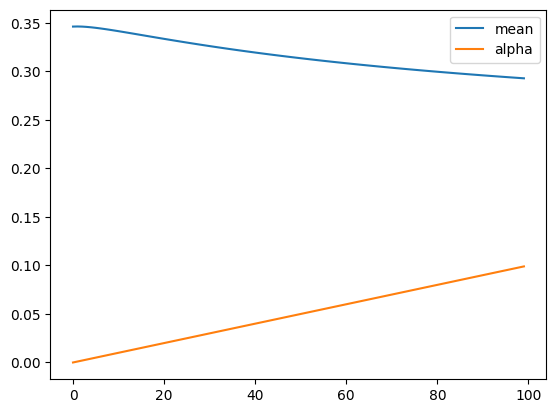

In [55]:
best_mean = 0
best_alpha = 0

ls_index = []
ls_mean = []
ls_alphas = []

for i in range(0, 1000, 10):
    elasnet = ElasticNet(alpha=i/10000,l1_ratio=.001)
    elasnet.fit(X, y)
    ls_res = cross_val_score(estimator = elasnet, X=X_train, y=y_train, cv=4, n_jobs=-1, scoring="r2")
    print(i/10000, "{:,.2%}".format(np.mean(ls_res)), "{:,.2f}".format(np.std(ls_res)))

    if np.mean(ls_res) > best_mean:
        best_mean = np.mean(ls_res)
        best_alpha = i/10000
        print(i,"{:,.2%}".format(np.mean(ls_res)),"{:,.2f}".format(np.std(ls_res)))

    ls_index.append(i)
    ls_mean.append(np.mean(ls_res))
    ls_alphas.append(i/10000)


df_res = pd.DataFrame({
    "index":ls_index,
    "mean":ls_mean,
    "alpha":ls_alphas
})

df_res[['mean','alpha']].plot(kind='line')

In [56]:
best_mean, best_alpha

(np.float64(0.3462603416521647), 0.001)

In [57]:
alpha_test = [0.0001, 0.00001, 0.000001, 0.0000001]

for a in alpha_test:
    
    elasticnet_model = ElasticNet(alpha=a, l1_ratio=.001)
    elasticnet_model.fit(X_train, y_train)

    ls_res = cross_val_score(estimator=elasticnet_model, X=X_test, y=y_test, cv=4, n_jobs=-1, scoring="r2")
    print(ls_res, "\n")

    print("MEAN: ", np.mean(ls_res))
    print("STD:  ", np.std(ls_res))
    print("Intercept: ", elasticnet_model.intercept_)
    print("Coef:      ", elasticnet_model.coef_)

    array_models.update({str(str(elasticnet_model).split("(")[0])+f"_{str(a)}": elasticnet_model})
    dc_scores.update({str(str(elasticnet_model).split("(")[0])+f"_{str(a)}": np.mean(ls_res)})
    

[0.34516744 0.28144978 0.33629294 0.26425568] 

MEAN:  0.30679145855054757
STD:   0.03462133413813948
Intercept:  2.8724944166186477
Coef:       [-1.14603815 -0.05331268 -0.00296007  0.86966801  0.28213417]
[0.34539151 0.28166204 0.33631749 0.26359026] 

MEAN:  0.30674032526438466
STD:   0.034855315623099896
Intercept:  2.8754849799523092
Coef:       [-1.15072722 -0.0565002  -0.00296006  0.87228918  0.28200158]
[0.34541393 0.28168311 0.33631985 0.26352296] 

MEAN:  0.3067349626355719
STD:   0.034879080106589626
Intercept:  2.8757862690938616
Coef:       [-1.15119899 -0.05682156 -0.00296006  0.87255232  0.28198825]
[0.34541618 0.28168522 0.33632008 0.26351622] 

MEAN:  0.30673442384799554
STD:   0.034881460248878185
Intercept:  2.875816420516867
Coef:       [-1.1512462  -0.05685373 -0.00296006  0.87257864  0.28198692]


In [58]:
elasticnet_model = ElasticNet(alpha=best_alpha, l1_ratio=.001)
elasticnet_model.fit(X_train, y_train)

ElasticNet(alpha=0.001, l1_ratio=0.001)

In [59]:
ls_res = cross_val_score(estimator=elasticnet_model, X=X_test, y=y_test, cv=4, n_jobs=-1, scoring="r2")
print(ls_res, "\n")

[0.34294698 0.27920733 0.33595765 0.27021732] 



In [60]:
print("MEAN: ", np.mean(ls_res))
print("STD:  ", np.std(ls_res))
print("Intercept: ", elasticnet_model.intercept_)
print("Coef:      ", elasticnet_model.coef_)

MEAN:  0.30708231927192053
STD:   0.032619400950089174
Intercept:  2.844670769911602
Coef:       [-1.10182533 -0.02387752 -0.00295983  0.84443961  0.2833947 ]


In [61]:
array_models.update({str(str(elasticnet_model).split("(")[0])+f"_{str(best_alpha)}": elasticnet_model})
array_models

{'Lars': Lars(),
 'Lasso_0.0001': Lasso(alpha=0.0001),
 'Lasso_1e-05': Lasso(alpha=1e-05),
 'Lasso_1e-06': Lasso(alpha=1e-06),
 'Lasso_1e-07': Lasso(alpha=1e-07),
 'Lasso_0.003': Lasso(alpha=0.003),
 'Ridge_0.0001': Ridge(alpha=0.0001),
 'Ridge_1e-05': Ridge(alpha=1e-05),
 'Ridge_1e-06': Ridge(alpha=1e-06),
 'Ridge_1e-07': Ridge(alpha=1e-07),
 'Ridge_0.0': Ridge(alpha=0.0),
 'ElasticNet_0.0001': ElasticNet(alpha=0.0001, l1_ratio=0.001),
 'ElasticNet_1e-05': ElasticNet(alpha=1e-05, l1_ratio=0.001),
 'ElasticNet_1e-06': ElasticNet(alpha=1e-06, l1_ratio=0.001),
 'ElasticNet_1e-07': ElasticNet(alpha=1e-07, l1_ratio=0.001),
 'ElasticNet_0.001': ElasticNet(alpha=0.001, l1_ratio=0.001)}

In [62]:
dc_scores.update({str(str(elasticnet_model).split("(")[0])+f"_{str(best_alpha)}": np.mean(ls_res)})
dc_scores

{'Lars': np.float64(0.30673436395426446),
 'Lasso_0.0001': np.float64(0.30671905886980966),
 'Lasso_1e-05': np.float64(0.30673311686186494),
 'Lasso_1e-06': np.float64(0.30673424193460663),
 'Lasso_1e-07': np.float64(0.30673435180867303),
 'Lasso_0.003': np.float64(0.30520828743355444),
 'Ridge_0.0001': np.float64(0.3067345678964384),
 'Ridge_1e-05': np.float64(0.30673438435143724),
 'Ridge_1e-06': np.float64(0.3067343659940112),
 'Ridge_1e-07': np.float64(0.3067343641582394),
 'Ridge_0.0': np.float64(0.30673436395426446),
 'ElasticNet_0.0001': np.float64(0.30679145855054757),
 'ElasticNet_1e-05': np.float64(0.30674032526438466),
 'ElasticNet_1e-06': np.float64(0.3067349626355719),
 'ElasticNet_1e-07': np.float64(0.30673442384799554),
 'ElasticNet_0.001': np.float64(0.30708231927192053)}

In [63]:
y_pred = elasticnet_model.predict(X_test)

Text(0, 0.5, 'Predicted Values')

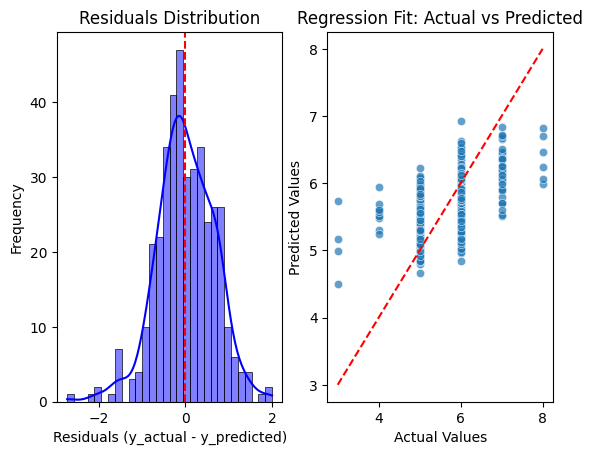

In [64]:
# Plot 1: Residuals Distribution.
plt.subplot(1,2,1)
residuals = y_test - y_pred
sns.histplot(residuals, bins=30, kde=True, color="blue")
plt.axvline(x=0, color='red', linestyle='--')
plt.title("Residuals Distribution")
plt.xlabel("Residuals (y_actual - y_predicted)")
plt.ylabel("Frequency")

# Plot 2: Regression Fit (Actual vs Predicted).
plt.subplot(1,2,2)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect fit line
plt.title("Regression Fit: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

volatile acidity = -1.1018253346
citric acid = -0.0238775161
total sulfur dioxide = -0.0029598306
sulphates = 0.8444396147
alcohol = 0.2833946991
Intercept: 2.844670769911602

Feature Coefficients:
                 Feature  Coefficient
0      volatile acidity    -1.101825
1           citric acid    -0.023878
2  total sulfur dioxide    -0.002960
3             sulphates     0.844440
4               alcohol     0.283395


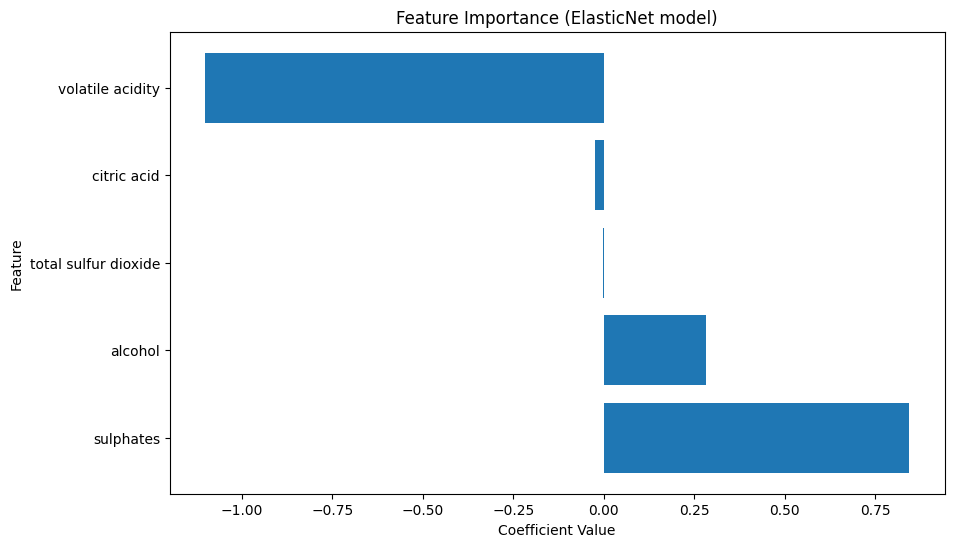

In [65]:
#print("Model coefficients:\n")
for i in range(X_test.shape[1]):
    print(X_test.columns[i], "=", elasticnet_model.coef_[i].round(10))

# Extraer información del modelo
print("Intercept:", elasticnet_model.intercept_)
coeff_df = pd.DataFrame({"Feature": X_test.columns, "Coefficient": elasticnet_model.coef_})
print("\nFeature Coefficients:\n", coeff_df)

# Resumir los resultados del modelo 
# Sort dataframe by coefficients.
coef_df_sorted = coeff_df.sort_values(by="Coefficient", ascending=False)

# Create plot.
plt.figure(figsize=(10,6))
#plt.barh(coeff_df["Feature"], coef_df_sorted["Coefficient"], color="blue")
plt.barh(data=coef_df_sorted, y="Feature", width="Coefficient")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title(f"Feature Importance ({str(elasticnet_model).split('(')[0]} model)")
plt.show()

## Regresión Bayesiana

In [66]:
bayes_model = BayesianRidge()
bayes_model.fit(X_train, y_train)

BayesianRidge()

In [67]:
ls_res = cross_val_score(estimator=bayes_model, X=X_test, y=y_test, cv=4, n_jobs=-1, scoring="r2")
print(ls_res, "\n")

[0.33602819 0.27160073 0.33464803 0.27665386] 



In [68]:
print("MEAN: ", np.mean(ls_res))
print("STD:  ", np.std(ls_res))
print("Intercept: ", bayes_model.intercept_)
print("Coef:      ", bayes_model.coef_)

MEAN:  0.30473270492740556
STD:   0.030661390611896717
Intercept:  2.848913395662003
Coef:       [-1.10864863 -0.02836882 -0.0029599   0.84839798  0.28319988]


In [69]:
array_models.update({str(str(bayes_model).split("(")[0]): bayes_model})
array_models

{'Lars': Lars(),
 'Lasso_0.0001': Lasso(alpha=0.0001),
 'Lasso_1e-05': Lasso(alpha=1e-05),
 'Lasso_1e-06': Lasso(alpha=1e-06),
 'Lasso_1e-07': Lasso(alpha=1e-07),
 'Lasso_0.003': Lasso(alpha=0.003),
 'Ridge_0.0001': Ridge(alpha=0.0001),
 'Ridge_1e-05': Ridge(alpha=1e-05),
 'Ridge_1e-06': Ridge(alpha=1e-06),
 'Ridge_1e-07': Ridge(alpha=1e-07),
 'Ridge_0.0': Ridge(alpha=0.0),
 'ElasticNet_0.0001': ElasticNet(alpha=0.0001, l1_ratio=0.001),
 'ElasticNet_1e-05': ElasticNet(alpha=1e-05, l1_ratio=0.001),
 'ElasticNet_1e-06': ElasticNet(alpha=1e-06, l1_ratio=0.001),
 'ElasticNet_1e-07': ElasticNet(alpha=1e-07, l1_ratio=0.001),
 'ElasticNet_0.001': ElasticNet(alpha=0.001, l1_ratio=0.001),
 'BayesianRidge': BayesianRidge()}

In [70]:
dc_scores.update({str(bayes_model).split("(")[0]: np.mean(ls_res)})
dc_scores

{'Lars': np.float64(0.30673436395426446),
 'Lasso_0.0001': np.float64(0.30671905886980966),
 'Lasso_1e-05': np.float64(0.30673311686186494),
 'Lasso_1e-06': np.float64(0.30673424193460663),
 'Lasso_1e-07': np.float64(0.30673435180867303),
 'Lasso_0.003': np.float64(0.30520828743355444),
 'Ridge_0.0001': np.float64(0.3067345678964384),
 'Ridge_1e-05': np.float64(0.30673438435143724),
 'Ridge_1e-06': np.float64(0.3067343659940112),
 'Ridge_1e-07': np.float64(0.3067343641582394),
 'Ridge_0.0': np.float64(0.30673436395426446),
 'ElasticNet_0.0001': np.float64(0.30679145855054757),
 'ElasticNet_1e-05': np.float64(0.30674032526438466),
 'ElasticNet_1e-06': np.float64(0.3067349626355719),
 'ElasticNet_1e-07': np.float64(0.30673442384799554),
 'ElasticNet_0.001': np.float64(0.30708231927192053),
 'BayesianRidge': np.float64(0.30473270492740556)}

In [71]:
y_pred = bayes_model.predict(X_test)

Text(0, 0.5, 'Predicted Values')

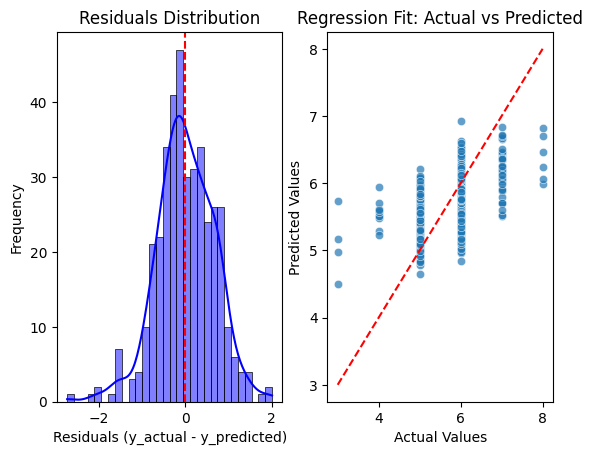

In [72]:
# Plot 1: Residuals Distribution.
plt.subplot(1,2,1)
residuals = y_test - y_pred
sns.histplot(residuals, bins=30, kde=True, color="blue")
plt.axvline(x=0, color='red', linestyle='--')
plt.title("Residuals Distribution")
plt.xlabel("Residuals (y_actual - y_predicted)")
plt.ylabel("Frequency")

# Plot 2: Regression Fit (Actual vs Predicted).
plt.subplot(1,2,2)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect fit line
plt.title("Regression Fit: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

volatile acidity = -1.1086486273
citric acid = -0.0283688154
total sulfur dioxide = -0.0029599044
sulphates = 0.8483979837
alcohol = 0.2831998835
Intercept: 2.848913395662003

Feature Coefficients:
                 Feature  Coefficient
0      volatile acidity    -1.108649
1           citric acid    -0.028369
2  total sulfur dioxide    -0.002960
3             sulphates     0.848398
4               alcohol     0.283200


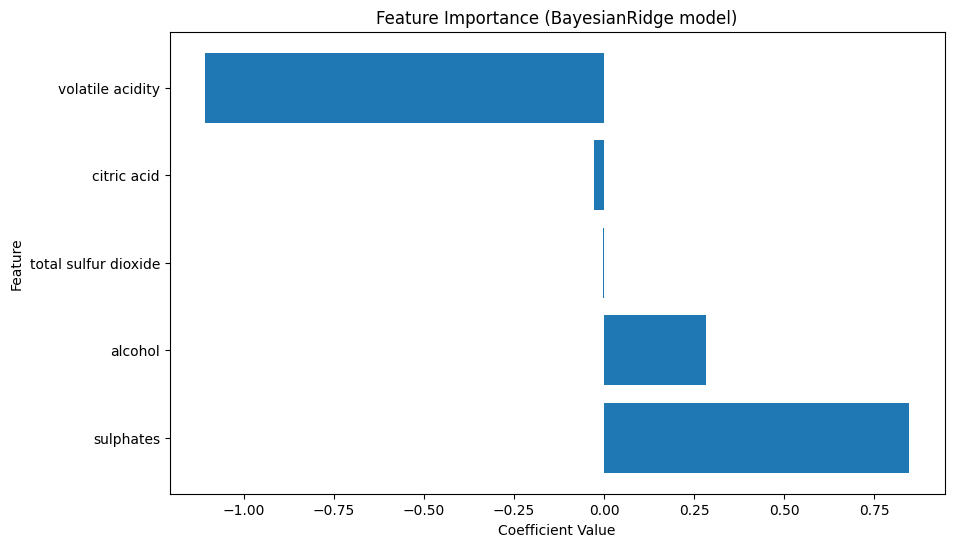

In [73]:
#print("Model coefficients:\n")
for i in range(X_test.shape[1]):
    print(X_test.columns[i], "=", bayes_model.coef_[i].round(10))

# Extraer información del modelo
print("Intercept:", bayes_model.intercept_)
coeff_df = pd.DataFrame({"Feature": X_test.columns, "Coefficient": bayes_model.coef_})
print("\nFeature Coefficients:\n", coeff_df)

# Resumir los resultados del modelo 
# Sort dataframe by coefficients.
coef_df_sorted = coeff_df.sort_values(by="Coefficient", ascending=False)

# Create plot.
plt.figure(figsize=(10,6))
#plt.barh(coeff_df["Feature"], coef_df_sorted["Coefficient"], color="blue")
plt.barh(data=coef_df_sorted, y="Feature", width="Coefficient")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title(f"Feature Importance ({str(bayes_model).split('(')[0]} model)")
plt.show()

# Resultados

In [74]:
resul = pd.DataFrame(columns=[])
alfas = pd.DataFrame(columns=[])

for name, model in array_models.items():# [lars_model, lasso_model, ridge_model, elasticnet_model, bayes_model]:
    resul[name] = model.coef_
    alfas[name] = [model.intercept_]

resul["features"] = ls_cont
resul = resul.set_index("features")
alfas["features"] = ["intercepto"]
alfas = alfas.set_index("features")
alfas

resul = pd.concat([resul,alfas])
resul = resul.reset_index()
resul

,features,Lars,Lasso_0.0001,Lasso_1e-05,Lasso_1e-06,Lasso_1e-07,Lasso_0.003,Ridge_0.0001,Ridge_1e-05,Ridge_1e-06,Ridge_1e-07,Ridge_0.0,ElasticNet_0.0001,ElasticNet_1e-05,ElasticNet_1e-06,ElasticNet_1e-07,ElasticNet_0.001,BayesianRidge
0,volatile acidity,-1.151251,-1.144686,-1.150595,-1.151186,-1.151245,-1.043793,-1.151247,-1.151251,-1.151251,-1.151251,-1.151251,-1.146038,-1.150727,-1.151199,-1.151246,-1.101825,-1.108649
1,citric acid,-0.056857,-0.049548,-0.056126,-0.056784,-0.056850,0.000000,-0.056854,-0.056857,-0.056857,-0.056857,-0.056857,-0.053313,-0.056500,-0.056822,-0.056854,-0.023878,-0.028369
2,total sulfur dioxide,-0.002960,-0.002961,-0.002960,-0.002960,-0.002960,-0.002948,-0.002960,-0.002960,-0.002960,-0.002960,-0.002960,-0.002960,-0.002960,-0.002960,-0.002960,-0.002960,-0.002960
3,sulphates,0.872582,0.868410,0.872164,0.872540,0.872577,0.775390,0.872579,0.872581,0.872582,0.872582,0.872582,0.869668,0.872289,0.872552,0.872579,0.844440,0.848398
4,alcohol,0.281987,0.282065,0.281995,0.281988,0.281987,0.284008,0.281987,0.281987,0.281987,0.281987,0.281987,0.282134,0.282002,0.281988,0.281987,0.283395,0.283200
5,intercepto,2.875820,2.872381,2.875476,2.875785,2.875816,2.845887,2.875817,2.875819,2.875820,2.875820,2.875820,2.872494,2.875485,2.875786,2.875816,2.844671,2.848913


In [85]:
resul.to_excel("/Users/gblasd/Documents/DataScience/02_SupervisedLearning/models/LR_results.xlsx", index=False)

In [75]:
k_ = []
v_ = []
for k,v in dc_scores.items():
    k_.append(k)
    v_.append(v)

mean_model = pd.DataFrame({
    "model":k_, "mean":v_
})

mean_model

,model,mean
0,Lars,0.306734
1,Lasso_0.0001,0.306719
2,Lasso_1e-05,0.306733
3,Lasso_1e-06,0.306734
4,Lasso_1e-07,0.306734
5,Lasso_0.003,0.305208
6,Ridge_0.0001,0.306735
7,Ridge_1e-05,0.306734
8,Ridge_1e-06,0.306734
9,Ridge_1e-07,0.306734


In [76]:
mean_model.sort_values(by='mean', ascending=False)

,model,mean
15,ElasticNet_0.001,0.307082
11,ElasticNet_0.0001,0.306791
12,ElasticNet_1e-05,0.306740
13,ElasticNet_1e-06,0.306735
6,Ridge_0.0001,0.306735
14,ElasticNet_1e-07,0.306734
7,Ridge_1e-05,0.306734
8,Ridge_1e-06,0.306734
9,Ridge_1e-07,0.306734
10,Ridge_0.0,0.306734


# El mejor modelo

In [80]:
best_model = array_models['ElasticNet_0.001']
best_model

ElasticNet(alpha=0.001, l1_ratio=0.001)

volatile acidity = -1.1018253346
citric acid = -0.0238775161
total sulfur dioxide = -0.0029598306
sulphates = 0.8444396147
alcohol = 0.2833946991
Intercept: 2.844670769911602

Feature Coefficients:
                 Feature  Coefficient
0      volatile acidity    -1.101825
1           citric acid    -0.023878
2  total sulfur dioxide    -0.002960
3             sulphates     0.844440
4               alcohol     0.283395


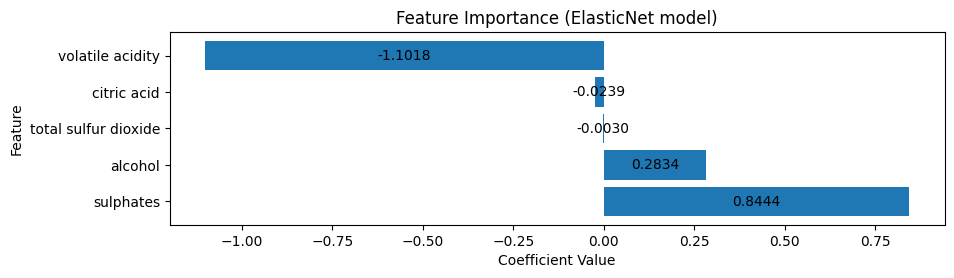

In [111]:
y_pred = best_model.predict(X_test)

#print("Model coefficients:\n")
for i in range(X_test.shape[1]):
    print(X_test.columns[i], "=", best_model.coef_[i].round(10))

# Extraer información del modelo
print("Intercept:", best_model.intercept_)
coeff_df = pd.DataFrame({"Feature": X_test.columns, "Coefficient": best_model.coef_})
print("\nFeature Coefficients:\n", coeff_df)

# Resumir los resultados del modelo 
# Sort dataframe by coefficients.
coef_df_sorted = coeff_df.sort_values(by="Coefficient", ascending=False)

# Create plot.
plt.figure(figsize=(10,2.5))
_ = plt.barh(data=coef_df_sorted, y="Feature", width="Coefficient")
plt.bar_label(_, fmt='%.4f', label_type="center")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title(f"Feature Importance ({str(best_model).split('(')[0]} model)")
plt.show()

Ejemplos

In [ ]:
# [376, 134, 412, 949, 479]
# Iterar sobre las filas de la muestra
for index, row in X_test.sample(5).iterrows():
    print(f"Index: {index}   y = {float(y_test.loc[[index]])}")

    # Intercepto
    y_hat=round(float(best_model.intercept_), 6)
    print(y_hat, end='')

    # Coeficientes
    for x,y in zip(best_model.coef_, row):
        y_hat += float(x)*float(y)
        print("+(", round(x, 6), "*", y, ")", end='')

    # valor de predicción
    print(" = ", round(y_hat, 6))

    print("\n")

Index: 376   y = 6.0
2.844671+( -1.101825 * 0.66 )+( -0.023878 * 0.15 )+( -0.00296 * 42.0 )+( 0.84444 * 0.54 )+( 0.283395 * 9.6 ) =  5.166158


Index: 134   y = 5.0
2.844671+( -1.101825 * 0.415 )+( -0.023878 * 0.36 )+( -0.00296 * 45.0 )+( 0.84444 * 0.64 )+( 0.283395 * 9.2 ) =  5.393298


Index: 412   y = 5.0
2.844671+( -1.101825 * 0.96 )+( -0.023878 * 0.2 )+( -0.00296 * 60.0 )+( 0.84444 * 0.44 )+( 0.283395 * 10.9 ) =  5.065109


Index: 949   y = 5.0
2.844671+( -1.101825 * 0.59 )+( -0.023878 * 0.29 )+( -0.00296 * 119.0 )+( 0.84444 * 0.5 )+( 0.283395 * 9.1 ) =  4.836561


Index: 479   y = 6.0
2.844671+( -1.101825 * 0.39 )+( -0.023878 * 0.23 )+( -0.00296 * 91.0 )+( 0.84444 * 0.55 )+( 0.283395 * 12.1 ) =  6.03364


